In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from utils import fit_vi
torch.set_default_dtype(torch.float64)
from tqdm.notebook import tqdm as tqdm

In [2]:
from perseus import Perseus
from viqa import VIQA

In [3]:
d = 2

In [164]:


import numpy as np
import pandas as pd
from numpy import linalg as LA
from scipy.optimize import minimize
from scipy.optimize import fmin_powell


# In[46]:


#Define the parameters for each firm
parameters=np.matrix([[10,5,1.2],[8,5,1.1],[6,5,1],[4,5,0.9],[2,5,0.8]])

#Define a table to output the iterations information
result_table=pd.DataFrame(columns=["q1", "q2", "q3", "q4", "q5"])

#Select initial point and uncertainty measure
qk=np.matrix([[10],[10],[10],[10],[10]]) 
result_table=pd.concat([result_table,
                        pd.DataFrame({"q1":float(qk[0]),"q2":float(qk[1]),"q3":float(qk[2]),"q4":float(qk[3]),"q5":float(qk[4])}, index=[0])], 
                        ignore_index=True)

len_uncert=0.005
termination=False
k=0
N= len(qk)

while not termination: 
    
    sol=[]
    
    for i in range(N):
        
        #Compute the total supply without the value of the ith player
        Qk=0
        for j in range(N): 
            if j !=i: 
                Qk+=float(qk[j])
        
        # Set the values of the parameters
        ci=parameters[i,0]
        Li=parameters[i,1]
        Bi=parameters[i,2]

        #Solve the optimization problem 
        fun=lambda qi: (qi*(5000**(1/1.1)*(qi+Qk)**(-1/1.1))-ci*qi-(Bi/(Bi+1))*(Li**(-1/Bi))*(qi**((Bi+1)/Bi)))*-1
        #bnds = [(0, None)]
        #res= minimize(fun, 100, method='SLSQP', bounds=bnds)
        res=fmin_powell(fun,40)
        
        #Save the solution
        sol.append(float(res))

        
    result_table=pd.concat([result_table, 
                            pd.DataFrame({"q1":np.round(sol[0],2),"q2":np.round(sol[1],2),"q3":np.round(sol[2],2),"q4":np.round(sol[3],2),"q5":np.round(sol[4],2)}, index=[0])], ignore_index=True)
    
    #Set the value of the new solution
    qk1=np.matrix([[sol[0]],[sol[1]],[sol[2]],[sol[3]],[sol[4]]]) 
    
    #Check termination criteria
    if LA.norm(qk1-qk)<=len_uncert: 
        termination=True
    
    #Update solution
    k+=1
    qk=qk1


# In[45]:


result_table


Optimization terminated successfully.
         Current function value: -1247.697538
         Iterations: 2
         Function evaluations: 31
Optimization terminated successfully.
         Current function value: -1324.469598
         Iterations: 2
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: -1386.627877
         Iterations: 2
         Function evaluations: 31
Optimization terminated successfully.
         Current function value: -1425.681462
         Iterations: 2
         Function evaluations: 32
Optimization terminated successfully.
         Current function value: -1433.033035
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -94.347363
         Iterations: 2
         Function evaluations: 20
Optimization terminated successfully.
         Current function value: -149.327595
         Iterations: 2
         Function evaluations: 21
Optimization ter

/var/folders/dd/cpjttnqd1835ygkgtppb3hp00000gn/T/ipykernel_62253/1407243657.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pd.DataFrame({"q1":float(qk[0]),"q2":float(qk[1]),"q3":float(qk[2]),"q4":float(qk[3]),"q5":float(qk[4])}, index=[0])],
/var/folders/dd/cpjttnqd1835ygkgtppb3hp00000gn/T/ipykernel_62253/1407243657.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_table=pd.concat([result_table,
/var/folders/dd/cpjttnqd1835ygkgtppb3hp00000gn/T/ipykernel_62253/1407243657.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is dep

,q1,q2,q3,q4,q5
0,10.00,10.00,10.00,10.00,10.00
1,55.03,56.19,55.76,53.41,49.14
2,27.19,32.99,36.16,36.51,34.38
3,42.62,46.76,48.01,46.37,42.30
4,33.56,38.85,41.17,40.54,37.47
5,38.89,43.53,45.19,43.92,40.22
6,35.78,40.80,42.83,41.93,38.58
7,37.61,42.41,44.22,43.09,39.53
8,36.54,41.47,43.41,42.41,38.97
9,37.16,42.02,43.88,42.81,39.30


In [174]:


import numpy as np
import pandas as pd
from numpy import linalg as LA
from scipy.optimize import minimize
from scipy.optimize import fmin_powell
import torch


# In[46]:


#Define the parameters for each firm
parameters=torch.tensor(np.matrix([[10,5,1.2],[8,5,1.1],[6,5,1],[4,5,0.9],[2,5,0.8]]))

#Define a table to output the iterations information
result_table=pd.DataFrame(columns=["q1", "q2", "q3", "q4", "q5"])

#Select initial point and uncertainty measure
qk=[torch.tensor(np.matrix([[10.],[10.],[10.],[10.],[10.]]), requires_grad=True)]
qs = [np.array(qk[0].detach()), np.array(qk[0].detach())]

optimizer = VIQA(qk, L=20, p_order = 2, last_iterate=True, B0=0.1, delta=0.1)
result_table=pd.concat([result_table,
                        pd.DataFrame({"q1":float(qk[0][0]),"q2":float(qk[0][1]),"q3":float(qk[0][2]),"q4":float(qk[0][3]),"q5":float(qk[0][4])}, index=[0])], 
                        ignore_index=True)

c = parameters[:,0].view(-1, 1)
L = parameters[:,1].view(-1, 1)
B = parameters[:,2].view(-1, 1)

for epoch in range(500):    
    
    q = qs[-2]
    Q_k_1 = torch.ones(q.shape)*q.sum() - q

    #Solve the optimization problem
    def fun(q_k, Q_k_1):
        qQ = q_k + Q_k_1
        p = 5000**(1/1.1)*qQ**(-1/1.1)
        p_ = 5000**(1/1.1) * (-1/1.1) * qQ**(-1/1.1 - 1)
        return c*q_k +  B / (B + 1) * L**(1/B) * q_k**((B+1)/B) - p - q_k*p_

    def closure():
        optimizer.zero_grad()
        return fun(qk[0], Q_k_1)
    
    optimizer.step(closure)
    
    q = np.array(qk[0].detach())
    qs += [q]
    result_table=pd.concat([result_table, 
                            pd.DataFrame({"q1":np.round(q[0],2),"q2":np.round(q[1],2),"q3":np.round(q[2],2),"q4":np.round(q[3],2),"q5":np.round(q[4],2)}, index=[0])], 
                            ignore_index=True)
result_table


/var/folders/dd/cpjttnqd1835ygkgtppb3hp00000gn/T/ipykernel_62253/3640500978.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_table=pd.concat([result_table,


,q1,q2,q3,q4,q5
0,10.00,10.00,10.00,10.00,10.00
1,9.66,9.78,9.90,10.02,10.14
2,9.26,9.38,9.49,9.61,9.72
3,8.87,8.98,9.09,9.20,9.31
4,8.50,8.60,8.71,8.81,8.92
...,...,...,...,...,...
496,6.91,7.00,7.08,7.16,7.25
497,6.91,7.00,7.08,7.16,7.25
498,6.91,7.00,7.08,7.16,7.25
499,6.91,7.00,7.08,7.16,7.25


In [7]:
mu = torch.tensor(range(1,d+1)) - 0.5
A = torch.zeros(d,d)
c = 1 - 1e-5
for i in range(d):
    A[i] = mu[i] / (torch.tensor(range(1,d+1))+i) * c / (2 * d)

In [8]:
def f(x):
    return 1 / (1 - A @ x)

def f1(x):
    return x[0] - 1 / (1 - A @ x[0])

def f2(x):
    return 1 + A @ x * x

def F(x):
    return x[0]  - x[0] * A @ x[0] - 1

def gap(x):
    return torch.linalg.norm(x[0] - f(x[0]))

In [10]:
x = torch.ones(d)
norms = []
x_hist = [x]
for j in range(1000):
    x1 = f(x)
    norms += [(x1-x).norm()]
    x = x1 +0.
    x_hist += [x]
norms[-5:]

[tensor(1.3219e-07),
 tensor(1.3126e-07),
 tensor(1.3034e-07),
 tensor(1.2942e-07),
 tensor(1.2850e-07)]

In [11]:
x1

tensor([1.5257, 2.4617])

In [12]:
x = torch.ones(d)
norms = []
for j in range(1000):
    x2 = f2(x)
    norms += [(x2-x).norm()]
    x = x2 +0.
norms[-5:]

[tensor(3.0706e-06),
 tensor(3.0601e-06),
 tensor(3.0496e-06),
 tensor(3.0391e-06),
 tensor(3.0287e-06)]

In [13]:
x2

tensor([1.5255, 2.4608])

In [14]:
N = 500
param = [torch.zeros(d, requires_grad=True)]
optimizer = VIQA(param, L=.1, p_order = 2, last_iterate=True, B0=0.001, delta=0.001)
gaps_EG, grads_EG, times_EG = fit_vi(optimizer, iters_num = N, F=f1, param=param, gap=gap, precision=1e-50)
gaps_EG[-10:]

  0%|          | 0/500 [00:00<?, ?it/s]

AttributeError: 'list' object has no attribute 'to_numpy'

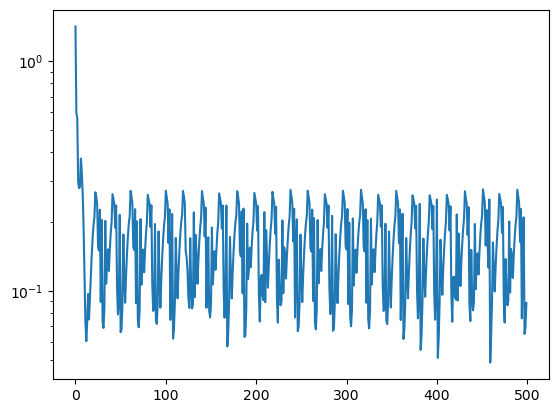

In [61]:
plt.semilogy(gaps_EG[:500])

In [49]:
F(param)

tensor([-2.8388e-10], grad_fn=<SubBackward0>)

In [16]:
param

[tensor([1.0610, 1.1065, 1.1388, 1.1643, 1.1853, 1.2032, 1.2186, 1.2322, 1.2441,
         1.2548, 1.2645, 1.2732, 1.2812, 1.2885, 1.2952, 1.3014, 1.3072, 1.3125,
         1.3175, 1.3221], requires_grad=True)]

In [8]:
d = 10
x = torch.ones(nd)
x.requires_grad = True
param = [x,y]
optimizer = Perseus(param, L=10, p_order=2, last_iterate=True)
gaps = []
iters = 0
while iters < 2000:
    def closure():
        optimizer.zero_grad()
        return F_torch(param)
    func_loss = gap_torch(param)
    gaps.append(func_loss.item())

    optimizer.step(closure)
    iters += 1

plt.plot(gaps)
plt.title('Perseus 2 order')
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('Gap')
plt.show()

PERSEUS2 = gaps

KeyboardInterrupt: 

In [ ]:
n = 10
x = torch.ones(n) / n
x.requires_grad = True
y = torch.ones(n) / n
y.requires_grad = True
param = [x,y]
optimizer = Perseus(param, L=0.5, p_order=1, last_iterate=True)
gaps = []
iters = 0
while iters < 2000:
    def closure():
        optimizer.zero_grad()
        return F_torch(param)
    func_loss = gap_torch(param)
    gaps.append(func_loss.item())

    optimizer.step(closure)
    iters += 1

plt.plot(gaps)
plt.title('Perseus 1 order')
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('Gap')
plt.show()

PERSEUS1 = gaps

In [ ]:
import torch
from torch.optim.optimizer import Optimizer
from OPTAMI.utils import tuple_to_vec
class Heracles(Optimizer):
    MONOTONE = False
    SKIP_TEST_LOGREG = True
    def __init__(self,
                    params,
                    L: float = 1., delta: float = 0., B0: float = 0., memory: int = 10, p_order: int = 1, last_iterate: bool = True,
                 verbose: bool = True, testing: bool = False, qn = 'BFGS', half = 1
                ):
        super().__init__(params, dict(L=L))

        self.verbose = verbose
        self.testing = testing
        self.qn = qn
        self.half = half

        self.last_iterate = last_iterate
        self.p_order = p_order
        self.L = L
        self.delta = delta
        self.B0 = B0
        self.memory = memory

        if len(self.param_groups) != 1:
            raise ValueError("Superfast doesn't support per-parameter options "
                             "(parameter groups)")
        group = self.param_groups[0]
        params = group['params']
        p = next(iter(params))
        state_common = self.state[p]
        state_common['k'] = 0
        state_common['S_qn'] = []
        state_common['Y_qn'] = []

        if not self.last_iterate:
            state_common['lambda_sum'] = 0.

        # Initialization of intermediate points
        for p in params:
            state = self.state[p]
            state['x0'] = p.detach().clone()
            state['x'] = state['x0'].clone()
            state['v'] = state['x0'].clone()
            state['s'] = torch.zeros_like(state['x'])

            if not self.last_iterate:
                state['x_average'] = torch.zeros_like(p)

    #lambda_computation
    @torch.no_grad()
    def compute_lambda(self, L, params, delta=0.):
        bound = (1 / (20 * self.p_order - 8) + 1 / (10 * self.p_order + 2)) / 2
        den = 1
        for m in range(1, self.p_order+1):
            den *= m
        norm = 0.
        with torch.no_grad():
            for p in params:
                state = self.state[p]
                norm += (p - state['v']).square().sum()**.5
        return  bound / (L * norm ** (self.p_order-1)/den + delta)

    @torch.no_grad()
    def full_inverse_vector(self, A, b, tau):
        return torch.linalg.inv(A + torch.diag(torch.ones_like(b)).mul_(tau)) @ b

    @torch.no_grad()
    def subproblem_solver(self, A, b, L, inverse_vector, delta=0., tau_up = 0.01 , tau_low = 0., max_iter = 20):

        j = 0
        flag = True
        while flag and j < max_iter:
            h = - inverse_vector(A,b,5 * L * tau_up + delta)
            norm = torch.linalg.norm(h).item()
            if norm > tau_up:
                tau_up *= 2
            else:
                flag = False
            j+=1

        j = 0
        h = torch.zeros_like(b)
        norm = 0.
        criteria = 100.
        while j < max_iter and criteria > L / 2 * norm ** 2: #and abs(tau - norm) > 0.001
            tau = (tau_up + tau_low) / 2
            h = - inverse_vector(A,b,5*L/2*tau+ delta)
            norm = torch.linalg.norm(h).item()
            #print(tau, norm)
            if norm < tau:
                tau_up = tau + 0.5
            else:
                tau_low = tau + 0.5
            j += 1
            c = b + A @ h + 5 * L / 2 * torch.linalg.norm(h) * h + delta * h
            criteria = torch.norm(c)
        return h#, criteria

    def Broyd_qn(self, params, S, Y, B0):
        V_qn = []
        C_qn = []
        U_qn = []
        g = tuple_to_vec.tuple_to_vector(list(params))
        B = torch.diag(torch.ones_like(g)).mul_(B0)

        if len(S) == 0:
            return V_qn, C_qn, U_qn, B

        for i in range(len(S)):
            s = tuple_to_vec.tuple_to_vector(S[-1-i])
            v = s.clone()
            y = tuple_to_vec.tuple_to_vector(Y[-1-i])
            u = y - B @ s
            c = 1/v.mul(v).sum()
            C_qn.insert(0, c)
            V_qn.insert(0, v)
            U_qn.insert(0, u)
            B += u.outer(v) * c
        return V_qn, C_qn, U_qn, B
    
    def Broyd_qn_damped(self, params, S, Y, B0, memory):
        V_qn = []
        C_qn = []
        U_qn = []
        g = tuple_to_vec.tuple_to_vector(list(params))
        B = torch.diag(torch.ones_like(g)).mul_(B0)

        if len(S) == 0:
            return V_qn, C_qn, U_qn, B

        for i in range(len(S)):
            s = tuple_to_vec.tuple_to_vector(S[-1-i])
            v = s.clone()
            y = tuple_to_vec.tuple_to_vector(Y[-1-i])
            u = y - B @ s
            c = 1/(v.mul(v).sum() * (memory + 1))
            C_qn.insert(0, c)
            V_qn.insert(0, v)
            U_qn.insert(0, u)
            B += u.outer(v) * c
        return V_qn, C_qn, U_qn, B
    
    def BFGS_qn(self, params, S, Y, B0, memory = 0):
        V_qn = []
        C_qn = []
        U_qn = []
        g = tuple_to_vec.tuple_to_vector(list(params))
        B = torch.diag(torch.ones_like(g)).mul_(B0)

        if len(S) == 0:
            return V_qn, C_qn, U_qn, B

        for i in range(1, len(S)):
            s = tuple_to_vec.tuple_to_vector(S[-1-i])
            y = tuple_to_vec.tuple_to_vector(Y[-1-i])

            #part 1
            c1 = 1/(y.mul(s).sum() * (memory + 1))
            C_qn.insert(0, c1)
            V_qn.insert(0, s)
            U_qn.insert(0, y)


            #part 2
            u = B @ s
            c2 = - 1 / s.mul(u).sum()
            C_qn.insert(0, c2)
            V_qn.insert(0, u)
            U_qn.insert(0, u)
            B += u.outer(u) * c2
            B += y.outer(y) * c1


        return V_qn, C_qn, U_qn, B

    #step 3
    def qn_step(self, params, operator_v, S, Y, B0=0):
        b = tuple_to_vec.tuple_to_vector(operator_v).detach().clone()

        if self.qn == 'BFGS':
            V_qn, C_qn, U_qn, B = self.BFGS_qn(params, S, Y, B0, memory=0)
        elif self.qn == 'BFGS_broid':
            V_qn, C_qn, U_qn, B1 = self.BFGS_qn(params, S, Y, B0, memory=0)
            V_qn, C_qn, U_qn, B2 = self.Broyd_qn(params, S, Y, B0)
            B = (B1 + B2) / (1 + self.half)
        elif self.qn == 'BFGS_damped':
            V_qn, C_qn, U_qn, B1 = self.BFGS_qn(params, S, Y, B0, memory=0)
            V_qn, C_qn, U_qn, B2 = self.Broyd_qn_damped(params, S, Y, B0, memory=0)
            B = (B1 + B2) / (1 + self.half)

        elif self.qn == 'damped_BFGS':
            V_qn, C_qn, U_qn, B = self.BFGS_qn(params, S, Y, B0, memory=self.memory)
        elif self.qn == 'damped_BFGS_broid':
            V_qn, C_qn, U_qn, B1 = self.BFGS_qn(params, S, Y, B0, memory=self.memory)
            V_qn, C_qn, U_qn, B2 = self.Broyd_qn(params, S, Y, B0)
            B = (B1 + B2) / (1 + self.half)
        elif self.qn == 'damped_BFGS_damped':
            V_qn, C_qn, U_qn, B1 = self.BFGS_qn(params, S, Y, B0, memory=self.memory)
            V_qn, C_qn, U_qn, B2 = self.Broyd_qn_damped(params, S, Y, B0, memory=self.memory)
            B = (B1 + B2) / (1 + self.half)
        elif self.qn == 'broyd':
            V_qn, C_qn, U_qn, B = self.Broyd_qn(params, S, Y, B0)
        elif self.qn == 'damped_broyd':
            V_qn, C_qn, U_qn, B = self.Broyd_qn_damped(params, S, Y, B0, memory=self.memory)
        else:
            raise ValueError
        h = self.subproblem_solver(B, b, L = self.L, delta = self.delta, inverse_vector = self.full_inverse_vector)
        h_tuple = tuple_to_vec.rollup_vector(h, list(params))
        return h_tuple

    def jacobian(self, params, operator_vector):
        full_jacobian = []
        for g in operator_vector:
            temp_jvp = torch.autograd.grad(g, params, retain_graph=True)
            full_jacobian.append(tuple_to_vec.tuple_to_vector(temp_jvp))
        return torch.stack(full_jacobian)


    def step(self, closure):

        closure = torch.enable_grad()(closure)

        assert len(self.param_groups) == 1
        group = self.param_groups[0]
        params = group['params']
        p = next(iter(params))
        state_common = self.state[p]


        #step 2
        with torch.no_grad():
            for p in params:
                state = self.state[p]
                state['v'] = state['x0'] + state['s'] #/ self.L
                p.zero_().add_(state['v'])

        operator_v = closure()



        h_tuple = self.qn_step(params, operator_v, S = state_common['S_qn'], Y = state_common['Y_qn'], B0 = self.B0)

        state_common['S_qn'].insert(0, h_tuple)
        if len(state_common['S_qn']) > self.memory:
            state_common['S_qn'].pop()


        with torch.no_grad():
            for p, z in zip(params,h_tuple):
                state = self.state[p]
                p.add_(z)
                state['x'] = p.clone().detach()


        with torch.no_grad():
            for p in params:
                state = self.state[p]
                state['x'] = p.clone()

        lamb = self.compute_lambda(self.L, params, delta=self.delta)
        #lamb = 1.
        operator_x = closure()

        oper_dif = []
        with torch.no_grad():
            for g2, g1 in zip(operator_x,operator_v):
                oper_dif.append(g2-g1)

        state_common['Y_qn'].insert(0, oper_dif)
        if len(state_common['Y_qn']) > self.memory:
            state_common['Y_qn'].pop()


        if not self.last_iterate:
            state_common['lambda_sum'] += lamb


        with torch.no_grad():
            for p, g in zip(params, operator_x):
                state = self.state[p]
                state['s'].sub_(g, alpha = lamb)

                if not self.last_iterate:
                    state['x_average'].mul_(state_common['lambda_sum']).add_(state['x'] * lamb)
                    state_common['lambda_sum'] += lamb
                    state['x_average'].div_(state_common['lambda_sum'])
                    p.zero_().add_(state['x_average'])

        state_common['k'] += 1


In [ ]:
n = 10
x = torch.ones(n) / n
x.requires_grad = True
y = torch.ones(n) / n
y.requires_grad = True
param = [x,y]
optimizer = Heracles(param, L=50, p_order=2, last_iterate=True, delta=0.06, memory=20, B0=0.01, qn='damped_broyd', half=1)
gaps = []
iters = 0
while iters < 2000:
    def closure():
        optimizer.zero_grad()
        return F_torch(param)
    func_loss = gap_torch(param)
    gaps.append(func_loss.item())

    optimizer.step(closure)
    iters += 1

plt.plot(gaps)
plt.title('VIQA')
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('Gap')
plt.show()

damped_broyd = gaps

In [ ]:
n = 10
x = torch.ones(n) / n
x.requires_grad = True
y = torch.ones(n) / n
y.requires_grad = True
param = [x,y]
optimizer = Heracles(param, L=50, p_order=2, last_iterate=True, delta=0.06, memory=20, B0=0.01, qn='broyd', half=1)
gaps = []
iters = 0
while iters < 2000:
    def closure():
        optimizer.zero_grad()
        return F_torch(param)
    func_loss = gap_torch(param)
    gaps.append(func_loss.item())

    optimizer.step(closure)
    iters += 1

plt.plot(gaps)
plt.title('VIQA')
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('Gap')
plt.show()

broyd = gaps

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import ticker as mticker
from matplotlib.pyplot import figure

figure(figsize=(8, 6))
plt.tight_layout()

N = 2000
step = 100
plt.semilogy(np.array(range(0,len(EG1[:N]),step)), EG1[:N:step], 'b-', label='EG', )
plt.semilogy(np.array(range(0,len(PERSEUS1[:N]),step)), PERSEUS1[:N:step], 'm:', label='Perseus1')
plt.semilogy(np.array(range(0,len(PERSEUS2[:N]),2*step)), PERSEUS2[:N:2*step], 'g--', label='Perseus2')
plt.semilogy(np.array(range(0,len(damped_broyd[:N]),step)), damped_broyd[:N:step], 'r-.', label='VIQA Damped Broyden')
plt.semilogy(np.array(range(0,len(broyd[:N]),step)), broyd[:N:step], 'v-.', label='VIQA Broyden')

plt.legend()
plt.xlabel('Iteration, k')
plt.ylabel('Gap')

# plt.axis([-1000, 200000, 8e-16, 2.,], emit=True)
plt.minorticks_on()
# plt.xticks(rotation=-70)
#plt.savefig('GAP Iteration.pdf', format='pdf')



In [ ]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import ticker as mticker
from matplotlib.pyplot import figure

figure(figsize=(8, 6))
plt.tight_layout()

N = 2000
step = 100
plt.semilogy(2*np.array(range(0,len(EG1[:N]),step)), EG1[:N:step], 'b-', label='EG', )
plt.semilogy(2*np.array(range(0,len(PERSEUS1[:N]),step)), PERSEUS1[:N:step], 'm:', label='Perseus1')
plt.semilogy((n+1)*np.array(range(0,len(PERSEUS2[:N//4]),2*step)), PERSEUS2[:N//4:2*step], 'g--', label='Perseus2')
plt.semilogy(2*np.array(range(0,len(damped_broyd[:N]),step)), damped_broyd[:N:step], 'r-.', label='VIQA Damped Broyden')
plt.semilogy(2*np.array(range(0,len(broyd[:N]),step)), broyd[:N:step], 'v-.', label='VIQA Broyden')
plt.legend()

plt.xlabel('JVP/F(x) computations')
plt.ylabel('Gap')

# plt.axis([-1000, 200000, 8e-16, 2.,], emit=True)
plt.minorticks_on()
# plt.xticks(rotation=-70)
#plt.savefig('GAP JVP.pdf', format='pdf')

